In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.simplefilter('ignore')

import wrangle as w

In [2]:
def wrangle_exams():
    '''
    read csv from url into df, clean df, and return the prepared df
    '''
    # Read csv file into pandas DataFrame.
    file = "https://gist.githubusercontent.com/ryanorsinger/\
14c8f919920e111f53c6d2c3a3af7e70/raw/07f6e8004fa171638d6d599cfbf0513f6f60b9e8/student_grades.csv"
    df = pd.read_csv(file)
    #replace blank space with null value
    df.exam3 = df.exam3.replace(' ', np.nan)
    #drop all nulls
    df = df.dropna()
    #change datatype to exam1 and exam3 to integers
    df.exam1 = df.exam1.astype(int)
    df.exam3 = df.exam3.astype(int)
    return df

In [3]:
df = wrangle_exams()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


## explore univariate

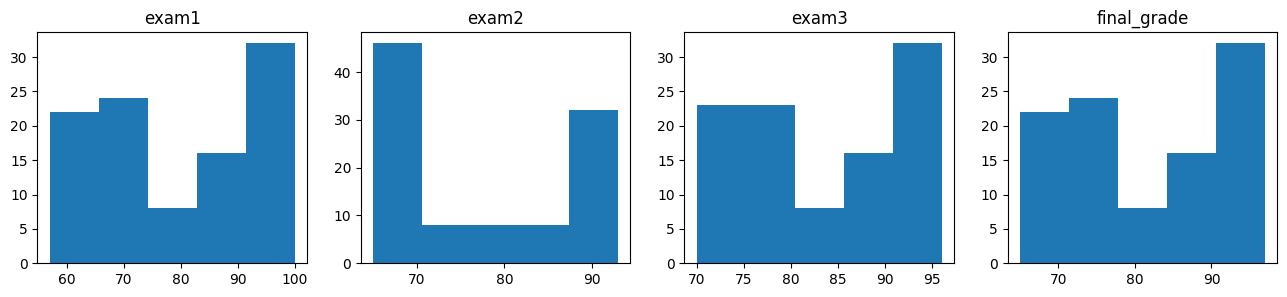

In [6]:
plt.figure(figsize=(16,3))

cols = ['exam1','exam2','exam3','final_grade']

for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1,4,plot_number)
    plt.title(col)
    df[col].hist(bins=5)
    plt.grid(False)
    
plt.show()

In [7]:
train,validate,test = w.split_continuous(df)

In [8]:
train.shape

(51, 5)

In [9]:
validate.shape

(61, 5)

In [10]:
test.shape

(41, 5)

In [11]:
exam_corr = train.drop(columns='student_id').corr(method='spearman')
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.939708,0.918186,0.982833
exam2,0.939708,1.000000,0.924114,0.897918
exam3,0.918186,0.924114,1.000000,0.933346
final_grade,0.982833,0.897918,0.933346,1.000000


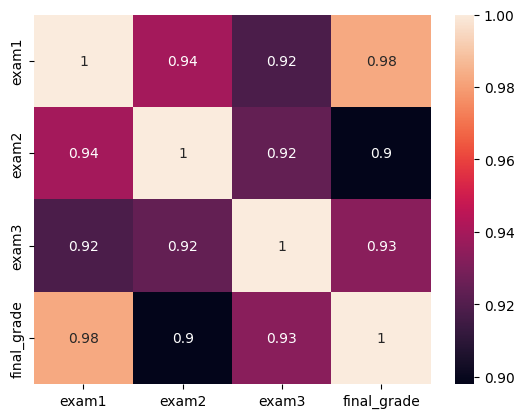

In [12]:
sns.heatmap(exam_corr,annot=True)
plt.show()

In [13]:
np.triu(exam_corr)

array([[1.        , 0.9397084 , 0.91818627, 0.98283288],
       [0.        , 1.        , 0.92411397, 0.89791828],
       [0.        , 0.        , 1.        , 0.93334641],
       [0.        , 0.        , 0.        , 1.        ]])

In [14]:
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.939708,0.918186,0.982833
exam2,0.939708,1.000000,0.924114,0.897918
exam3,0.918186,0.924114,1.000000,0.933346
final_grade,0.982833,0.897918,0.933346,1.000000


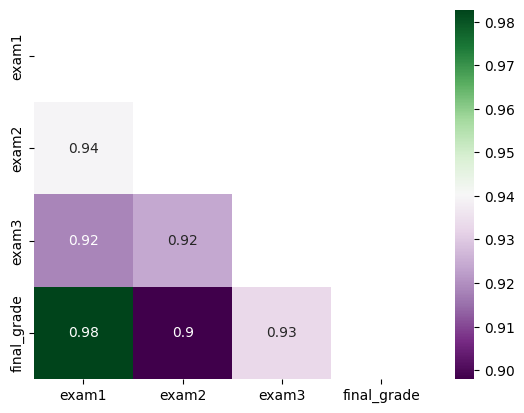

In [15]:
sns.heatmap(exam_corr,annot=True,cmap='PRGn',mask=np.triu(exam_corr))
plt.show()

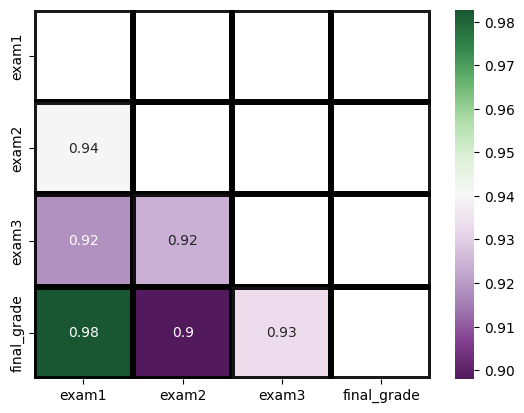

In [16]:
kwargs = {'alpha':0.9,
        'linewidth':3,
        'linestyle':'-',
        'linecolor':'black'}

sns.heatmap(exam_corr,annot=True,cmap='PRGn',mask=np.triu(exam_corr),**kwargs)
plt.show()

In [17]:
r,p = stats.spearmanr(train.exam1, train.final_grade)

In [18]:
alpha = 0.05

In [19]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


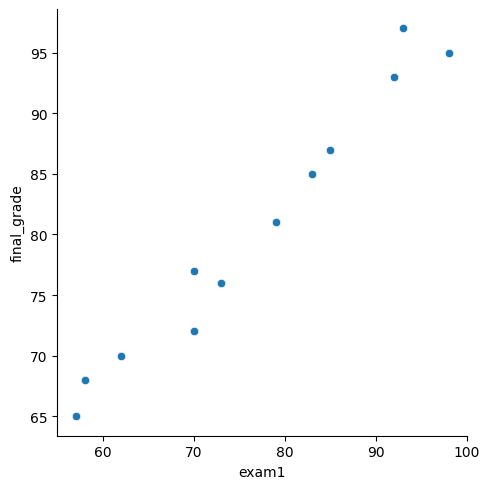

In [54]:
sns.relplot(data=train,x='exam1',y='final_grade')
plt.show()

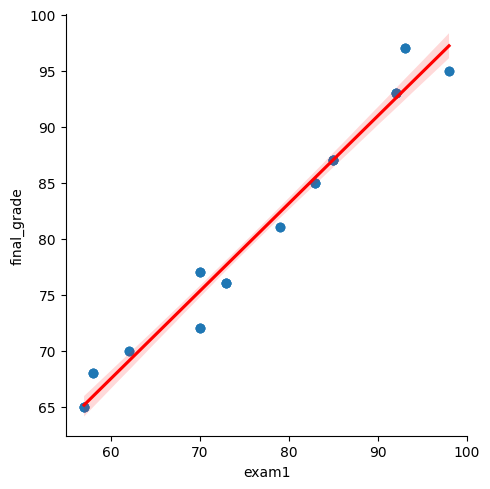

In [64]:
sns.lmplot(data=train,x='exam1',y='final_grade',line_kws={'color':'red'})
plt.show()

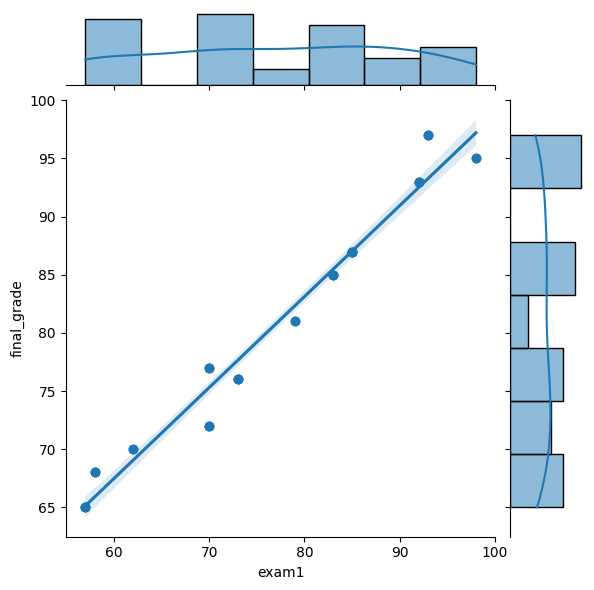

In [44]:
sns.jointplot(data=train,x='exam1',y='final_grade',kind='reg')
plt.show()

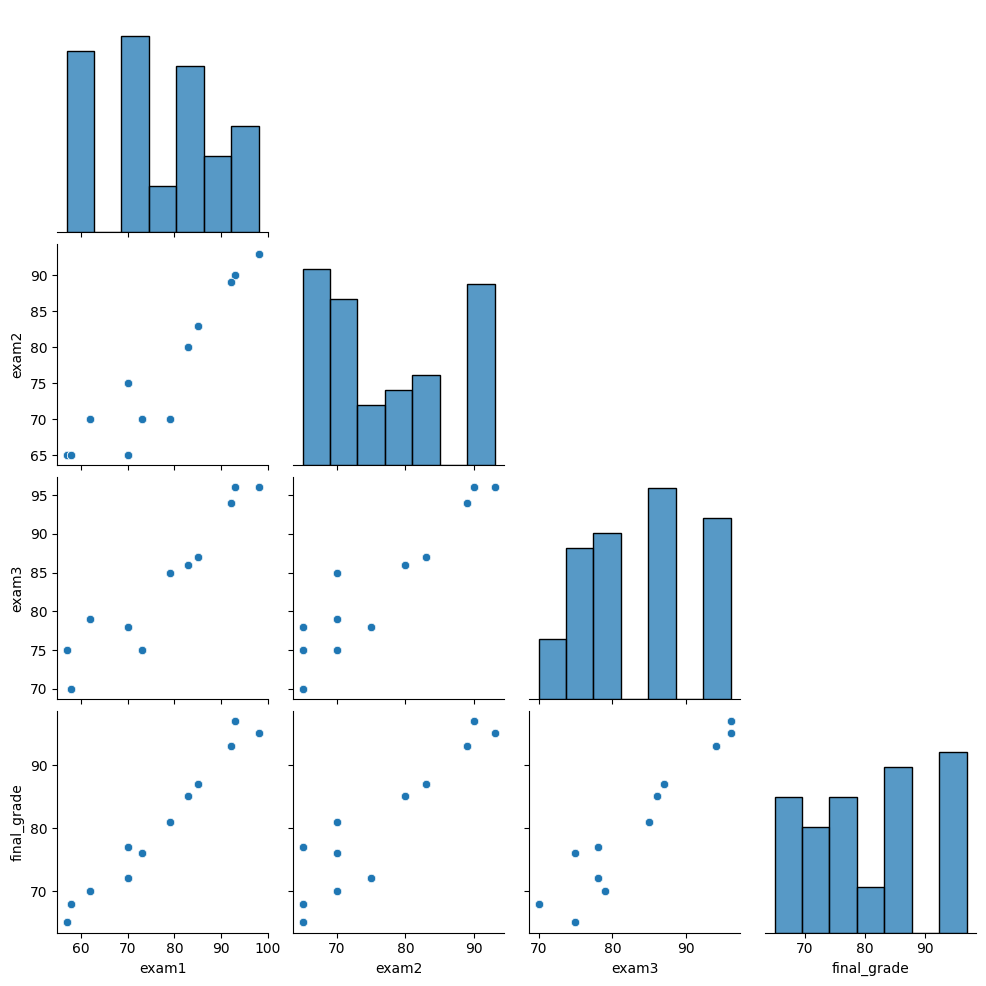

In [52]:
sns.pairplot(data=train.drop(columns='student_id'),corner=True)
plt.grid()